# Identification of fluorescent proteins by spectrophotometry

## Introduction

The green fluorescent protein (GFP) was incidentally discovered after the bioluminescent protein, aequorin, was purified from the jellyfish Aequorea Victoria (Shimomura et al., 1962). Photoexcitation of GFP with blue light causes the chromophore contained within the protein to fluoresce a bright green colour (N. Day and W. Davidson, 2009). The GFP gene encodes all necessary information for posttranslational synthesis such that jellyfish-specific enzymes are not necessary to induce fluorescence, enabling GFP to be expressed in other organisms (Tsien, 1998). In addition, its inability to alter host protein function as well as high stability in the presence of denaturants and proteases makes GFP a robust biomarker and reporter protein (Patterson et al., 1997; Chalfie et al., 1994). 

Numerous rounds of genetic engineering of GFP has resulted in a variety of mutants, one of the earlier mutants generated were enhanced GFP (EGFP) and cyan fluorescent protein (CFP) (Heim et al., 1994). The EGFP mutant, resulting from a F64L and S65T substitution, has its emission peak shifted to ~508nm, fluoresces more strongly and efficiently than wild-type GFP. While the CFP mutant, resulting from a Y66W substitution, produces an indole chromophore rather than a phenol which emits a blue-green or cyan colour at 485 nm (Tsien, 1998). The spectral characteristics of these proteins are detailed in **Table 1**. Overall, these modifications enhances the versatility of GFP and its variants, allowing a greater range of biological applications such as visualizing the expression of multiple transcription factors during cell differentiation in real-time (Filipczyk et al., 2015). <br />

![Table1](Figures/Table1.png)
*Table 1. Spectral characteristics of GFP, EGFP and CFP. Adapted from Tsien (1998).* <br />

A spectrophotometer is an instrument that measures the number of photons absorbed after it has passed through a solution. A UV-visible spectrophotometer can illuminate a sample from the UV to visible light range (190 – 900nm) and measure how much of the photons the sample absorbed, or transmitted if the light was reflected (Agilent). Spectrophotometers are therefore used to characterise the absorbance of fluorescent proteins to determine their spectral profile.

### Biological Problem & Computational Solution
Although an extensive database for fluorescent proteins has been established, it lacks features that can identify unknown fluorescent proteins (Lambert, 2019). Novel proteins would first have to be characterised individually and curated for approval. However, there are no known programs that can automatically identify uncharacterised fluorescent proteins. Conventionally, fluorescent proteins are characterised by fluorescent spectrophotometry, have their properties calculated, then manually identified by comparing against known proteins found in the literature (Costantini et al., 2015; Patterson et al., 1997). In addition, with numerous GFP variants, some of which have overlapping spectral profiles, the need for a tool to determine variants precisely and objectively would be greatly beneficial for biological research. Therefore, to reduce some technical steps in an experimental pipeline, we developed a prototype Python program that executes the following process: <br />

1.	Read local user imported csv files. <br />
2.	Determine the maximum absorbance and corresponding wavelength position of each sample. <br />
3.	Compare sample emission spectra to a reference (GFP, EGFP and CFP) with hypothesis testing. <br />
4.	Identify and characterise the sample. <br />
5.	Create an annotated plot of samples and save as an image file. <br />
6.	Export results to a text file.

## Method & Results

To demonstrate the functionality of our program, we analysed three unknown fluorescent protein samples (A, B, C) obtained from spectrophotometer readings.

**Packages and libraries**

The following packages are required to run the code. To minimise depending on various packages, we chose to utilise the most common packages in our analysis - primarily NumPy, pandas, and matplotlib. The first two were chosen to conveniently navigate through the dataset by storing data as data frames and arrays. Additionally, certain features of matplotlib and SciPy also depend on the use NumPy arrays, such as statistical test functions.

In [20]:
%reset -f 
#Reset environment variables per run; only use if running the program more than once.

In [3]:
import numpy as np #for various numerical functions
import pandas as pd #Using pandas to make navigating through input file easier
import matplotlib.pyplot as plt #create plots
from scipy import stats #for statistical tests
import pymsgbox #Used for making pop-up message boxes
plt.style.use('ggplot') # default style looked bland

**Importing data files**

Here, the user may wish to import up to three sample csv files for simultaneous analysis as multiple fluorescent proteins are commonly used in experiments (N. Day and W. Davidson, 2009). This enables flexibility and prevents the user from running the program repeatedly for each sample. 

In [27]:
#Function that can import up to 3 csv files at once and converts them into Pandas dataframes. 
# Maximum of 3 chosen since the user has to manually type in the file name for each iteration of the loop. Having to type more than this can be tedious.
user_files = [] # For storing imported data
def importFiles(file_list):
    n_files = int(input("Number of csv files to import (max 3): ")) # User decides how many files to import
    files = 0 #Continues each iteration of the for loop until it is equal to n_files
    while files < n_files: 
        if n_files == 1: #Only iterates the while loop once if 1 file is imported
            try:
                with open(input("\nInsert file name e.g. 'sampleA': ")+'.csv','r') as csvfile: #User types in file name, file type suffix is not required.
                    input_df = pd.read_csv(csvfile)
                    input_df.name = csvfile.name # Assign dataframe name based on imported file
                    input_df.columns = input_df.columns.str.strip().str.lower() #reformat column headers
                    file_list.append(input_df) # Alternatively, don't have to add to list if 1 file is loaded.
                    
                    break
            except TypeError:
                print("Incorrect filetype imported. Only .csv is supported. Please try again.")
                break
            except FileNotFoundError:
                print(f"File not found. Please try again.")
                break
        elif n_files <= 3: #will loop through until given the given number of files is imported
            try: #Same principle as above
                with open(input(f"\nInsert file name e.g. 'sampleA': ")+'.csv','r') as csvfile:
                    input_df = pd.read_csv(csvfile)
                    input_df.name = csvfile.name 
                    input_df.columns = input_df.columns.str.strip().str.lower()
                    file_list.append(input_df)
                    files += 1
            except TypeError: 
                print("Incorrect filetype imported. Only .csv is supported. Please try again.")
                break 
            except FileNotFoundError:
                print(f"File not found. Please try again.")
                break
        else:
            print(f"Error! Tried to load in {n_files} files. Please select from 1 to 3 files.")
            break    
    if len(user_files) > 0:
        pymsgbox.alert(f'Imported {n_files} successfully.','Import success!',timeout=3000) #Confirmation popup that removes itself after 3 seconds or if user presses 'OK'.
    else:
        pass

importFiles(user_files)
for df in user_files:  # Preview imported data
    print(df.name)
    display(df.head())

FPsampleA.csv


,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,460.0,12008.85,460.0,10813.16,460.0,11654.85
1,460.5,12495.00,460.5,11250.91,460.5,12126.67
2,461.0,13152.30,461.0,11842.76,461.0,12764.59
3,461.5,13958.70,461.5,12568.87,461.5,13547.22
4,462.0,14864.85,462.0,13384.80,462.0,14426.66


FPsampleB.csv


,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,490,34205.9,490,33794.6,490,34222.2
1,491,36436.8,491,36298.2,491,36092.3
2,492,38884.6,492,38500.9,492,38213.2
3,493,41635.9,493,40926.8,493,40324.1
4,494,42938.4,494,42057.0,494,42089.8


FPsampleC.csv


,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,480,"252,496",480,"255,037",480,"254,110"
1,481,"293,826",481,"292,648",481,"293,249"
2,482,"339,201",482,"340,683",482,"336,333"
3,483,"384,546",483,"388,759",483,"385,764"
4,484,"444,350",484,"439,977",484,"443,150"


**Data wrangling**

We found that among the files tested for analysis, one file (sample C) consisted of string type data when numerical types were expected (float or integer). This resulted in incorrect plot points and type errors when doing calculations. We therefore created a function that searches for object type columns in a data frame, replace all string characters and convert the columns to contain numerical data. <br />

To further simplify the data, each imported file is unpacked from a list and assigned to individual data frames. This allows easier indexing for when further analyses are done.

In [28]:
#Checking if the immported data contains the correct format (readings are numeric)
#datatype = i.dtypes #check datatype in dataframe with .dtypes
#Find column name then replace string and convert to numeric
#Limitation: assumes csv contains only numerical data.
def convertStringType(df_store):
    #select columns from each data frame that has an 'object' type
    df_index_obj = df_store.select_dtypes(include=['object']).columns
    df_store[df_index_obj] = df_store[df_index_obj].replace('[^0-9.]','',regex=True)#look for numerics and decimals using regular expression
    df_store[df_index_obj] = df_store[df_index_obj].apply(pd.to_numeric, errors = 'coerce')#coerce will return missing values as NaNs
    return df_store

#Seperate dataframes into individual variables - makes downstream indexing easier, but limits the quantity of samples that can be processed since these have to be assigned manually.
sample1 = None
sample2 = None
sample3 = None

for i,d in enumerate(user_files):
    convertStringType(d)
    display(d.head())
    print(f'{d.name}\n{d.dtypes}') #Verify that data has been converted

try: 
    sample1 = user_files[0]
except (AttributeError, NameError):
    print("Dataframe does not exist. Try loading in a file.") #One file has to be loaded.
try:
    sample2 = user_files[1]
except AttributeError:
    del sample2 # Deleted to prevent issues later as the variable can be changed from None to contain other values.
try:
    sample3 = user_files[2]
except AttributeError:
    del sample3

,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,460.0,12008.85,460.0,10813.16,460.0,11654.85
1,460.5,12495.00,460.5,11250.91,460.5,12126.67
2,461.0,13152.30,461.0,11842.76,461.0,12764.59
3,461.5,13958.70,461.5,12568.87,461.5,13547.22
4,462.0,14864.85,462.0,13384.80,462.0,14426.66


FPsampleA.csv
wavelength1    float64
absorbance1    float64
wavelength2    float64
absorbance2    float64
wavelength3    float64
absorbance3    float64
dtype: object


,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,490,34205.9,490,33794.6,490,34222.2
1,491,36436.8,491,36298.2,491,36092.3
2,492,38884.6,492,38500.9,492,38213.2
3,493,41635.9,493,40926.8,493,40324.1
4,494,42938.4,494,42057.0,494,42089.8


FPsampleB.csv
wavelength1      int64
absorbance1    float64
wavelength2      int64
absorbance2    float64
wavelength3      int64
absorbance3    float64
dtype: object


,wavelength1,absorbance1,wavelength2,absorbance2,wavelength3,absorbance3
0,480,252496,480,255037,480,254110
1,481,293826,481,292648,481,293249
2,482,339201,482,340683,482,336333
3,483,384546,483,388759,483,385764
4,484,444350,484,439977,484,443150


FPsampleC.csv
wavelength1    int64
absorbance1    int64
wavelength2    int64
absorbance2    int64
wavelength3    int64
absorbance3    int64
dtype: object


**Assigning a reference protein spectrum (GFP)**

Initially, we attempted to use a simulated GFP emission spectra by modelling a Gaussian curve and fit against sample curves, however this was beyond our scope and time constraints limited our options. 

We also attempted to use cosine similarity to score sample similarity, but found it was not the appropriate measure for this application. Scores were contradictory to actual identity of the protein. For instance, EGFP absorbance was considered highly identical to GFP despite being a magnitude greater. This was likely due to the vector trajectory moving in the same direction, as both samples create a bell-shaped curve. Thus, the cosine angle was deemed to be similar. Therefore, these approaches were not further pursued.

Instead, we randomised absorbance repeats (file: `gfp_sim.csv`) after an initial identification of sample B matching GFP. To set up for hypothesis testing for the samples, we tested for normality of the distribution of absorbance with a Shapiro-Wilk test imported from SciPy and visualising it with histograms. 

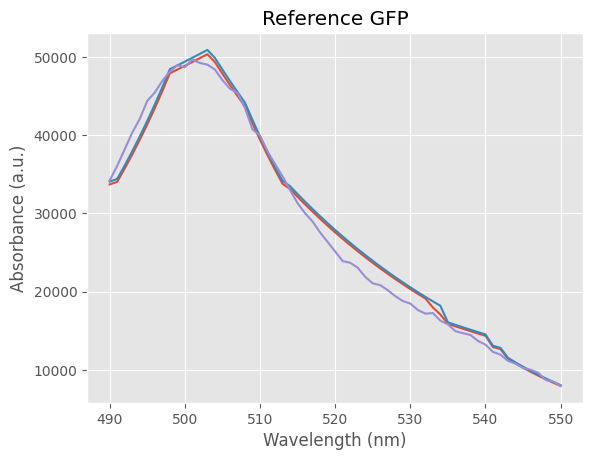

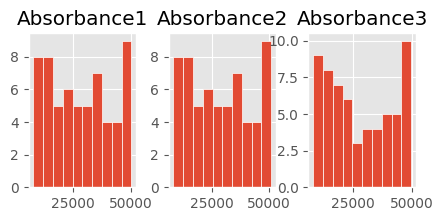

In [29]:
#Assigning GFP based on randomised data of sample B - suspected GFP.
# Could not find raw data from the literature.
gfp_df = pd.read_csv('gfp_sim.csv') #Included in the zip
gfp_df = (gfp_df.replace('[^0-9.]','',regex=True)).apply(pd.to_numeric, errors = 'coerce')
# Create data frame for absorbance repeats
gfp_abs = gfp_df.loc[:,['Absorbance1','Absorbance2','Absorbance3']]
#Quick plot
plt.plot(gfp_df.iloc[:,0],gfp_abs)
plt.title("Reference GFP")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (a.u.)")
#Test for normality with Shapiro Wilks test from scipy
shapiro_test = stats.shapiro(gfp_abs) 
#Not normally distributed - W stat = 0.93, p < 0.05
# Histogram to visualise this
gfp_abs.hist(layout = (1,3),figsize=[5,2],edgecolor='white')
plt.show()

**Determining the protein**

Based on the assumption of the Shapiro-Wilk test, the data was non-parametric ($W = 0.93, p < 0.05$), thus we chose to statistically determine the samples with a Mann-Whitney U test function, also imported from SciPy. If the null hypothesis was rejected ($p < 0.05$), the sample was assumed to not follow the same distribution as the reference and therefore was not GFP. However, this was not sufficient to distinguish one protein from another. For instance, GFP and CFP has similar absorbance values that the Mann-Whitney U (MWU) could not differentiate ($p > 0.05$). Therefore, other characteristics such as the emission wavelength and relative absorbance levels were assessed, in addition to the MWU test, as metrics to identify the protein. 

Emission spectra criteria was based on data summarised from Tsien (1998), whereas absorbance, as a measure for fluorescence, was decided based on observations made by Cormack et al. (1996) and Heim et al. (1994). Thus, samples were identified as GFP if it had an emission peak at ~504nm, relative absorbance ≈1.0, and MWU $p > 0.05$. EGFP was determined if $p < 0.05$, an emission peak at ~508nm was detected and at least 20-fold brighter than GFP. While samples with an emission peak at ~485nm and a lower relative absorbance to GFP (rel_abs $< 0.95$) are identified as CFP. If none of these conditions are satisfied, the program will consider the protein to be ambiguous.

Accordingly, we constructed a class to contain the identification function `GetProtein()` such that results returned can be called as objects downstream of the program. One feature of this function is that it allows the user to enter a defined offset value for emission wavelength ranging from 0 - 10nm to account for variation in the sample emission peak from reference values. This reduces the likelihood of returning an ambiguous result when the sample should be identified correctly. A dictionary was chosen to store the analysis results so that values are categorised to a unique key, whereas the values themselves are lists for easier indexing. They are also stored into separate variables (e.g., `protein_name`) for each sample so that they can be more easily called by other functions such as `exportResult()`.


In [61]:
# Chosen based on the assumption that normality is not satisfied
# One-sample Mann Whitney U test to determine whether absorbance distribution is significantly different from reference or not.
# Data is not paired - length of samples to be tested is not equal.
def mannWhitney(df):
    return stats.mannwhitneyu(df.iloc[:,1::2],gfp_abs)

class IDProtein:
    def __init__(self,df):
        self.df = df.copy() #Create a copy of the argument data frame to avoid possible errors
        self.df.name = df.name
        self.relAbs = [] # Stores the relative absorbance to GFP for each repeat
        self.FP_type = [] # Stores the identified protein name for each repeat

    def GetProtein(self):
        ymax_idx = self.df.iloc[:,1::2].idxmax() #get row index for max absorbance
        self.xmax = np.array(self.df.iloc[ymax_idx,0]) #Emission peak; located by indexing for the row with max absorbance
        self.ymax = np.array(self.df.iloc[:,1::2].max()) #Maximum absorbance; save these in an array for easier indexing and can iterate with for loops
        #Set how stringent the range in determining emission profile should be relative to reference
        wavelen_offset = -1
        while not int(wavelen_offset) in range(0,11):
            wavelen_offset = int(input(f"\nSelect a permissable offset for determining wavelength [0 - 10 nm (0 for strict matching)]: "))
            
        #GFP reference
        gfp_xmax = 504.0 #emission wavelength (nm)
        gfp_xupperThreshold = gfp_xmax + wavelen_offset #Range of wavelength to be assessed; upper boundary
        gfp_xlowerThreshold = gfp_xmax - wavelen_offset #lower boundary
        gfp_AvgMaxAbs = (gfp_df.iloc[:,1::2].max()).mean() #Take average maximum absorbance

        #EGFP reference
        egfp_xmax = 508.0  # Was reported to be between 507 - 509 nm, so used intermediate value.
        egfp_xupperThreshold = egfp_xmax + wavelen_offset
        egfp_xlowerThreshold = egfp_xmax - wavelen_offset
        # Brightness criteria based on Cormack et al. (1996)
        egfp_relAbs_lower = 20 
        egfp_relAbs_upper = 35
        
        #CFP reference
        cfp_xmax = 485.0
        cfp_xupperThreshold = cfp_xmax + wavelen_offset
        cfp_xlowerThreshold = cfp_xmax - wavelen_offset
        #Calculate relative absorbance of sample to GFP - divide sample max absorbance to average GFP max absorbance
        [self.relAbs.append(round(ym/gfp_AvgMaxAbs,3)) for ym in self.ymax] 
        
        # Function that prints the result for the code block below.
        def resultMessage(fp,fpxmax,thresh, abs):
            print(f"Matched {fp} ({fpxmax} nm) with {thresh} nm wavelength offset. Relative absorbance: {abs}\n")
        
        #MWU results and p-value per sample
        sample_mwu, self.mwu_pval = mannWhitney(self.df)
        
        #Determining the emission wavelength to GFP, EGFP and CFP.
        i = 0
        for pv,xm,ym,ab in zip(self.mwu_pval,self.xmax,self.ymax,self.relAbs): #iterate p-values, xmax and ymax
            print(f"{self.df.name} | Repeat {i+1}\nMaximum emission wavelength: {xm} nm\t Maximum absorbance: {ym}")
            if pv >= 0.05 and (xm >= gfp_xlowerThreshold and xm <= gfp_xupperThreshold)\
                and (ab >= 0.95 and ab <= 1.05):#Identifying GFP
                resultMessage("GFP",gfp_xmax,wavelen_offset,ab)
                self.FP_type.append("GFP")
            elif (pv >= 0.05 or pv <= 0.05) and (xm >= cfp_xlowerThreshold and xm <= cfp_xupperThreshold)\
                and (ab < 0.95): #Could not find precise CFP brightness in literature so assume it is slightly dimmer than GFP
                resultMessage("CFP",cfp_xmax,wavelen_offset,ab)
                self.FP_type.append("CFP")
            elif pv < 0.05 and (xm >= egfp_xlowerThreshold and xm <= egfp_xupperThreshold)\
                and (ab >= egfp_relAbs_lower and ab <= egfp_relAbs_upper ): #Identifying EGFP 
                resultMessage("EGFP",egfp_xmax,wavelen_offset,ab)
                self.FP_type.append("EGFP")
            else:
                print(f"Could not determine protein with emission maxima of {xm} nm. Current threshold: {wavelen_offset} nm\n")
                self.FP_type.append("N/A")
            i += 1
        return {'Protein':self.FP_type,'Emission peak':self.xmax.tolist(),
        'Absorbance peak':self.ymax.tolist(), 'Relative absorbance':self.relAbs, 'p-value': self.mwu_pval.tolist()} # Saved as a dict to categorise data by pairing values to a key
       
# Function that calls the identifier class and returns result
def runID(data): # Takes n sample arguments
    protein = IDProtein(data)
    p = protein.GetProtein()
    return p
# Takes n arguments for protein features and append to list to write to file in exportResult; minimises the amount of arguments needed in the actual function
def outputVars(*vars): 
    l = []
    for var in vars:
        l.append(var)
    return l   
#Function to save protein attributes into a list
def GetProfile(df):
    protein_run = runID(df)
    protein_name = protein_run['Protein']
    protein_xmax = protein_run['Emission peak']
    protein_ymax = protein_run['Absorbance peak']
    protein_rel_abs = protein_run['Relative absorbance']
    protein_pval = protein_run['p-value']
    protein_details = outputVars(protein_name, protein_xmax, protein_ymax, protein_rel_abs, protein_pval)
    return protein_details

def exportResult(df,details_list): #save results in a text file
    result_txt = str(input(f"Save {df.name} as: ")) #user-defined output file
    try:
        with open(result_txt+'.txt', 'w', newline='') as text_file:
            text_file.write(f"File: {df.name}\nProtein: {details_list[0]}\nEmission peak: {details_list[1]}\
                \nAbsorbance peak:{details_list[2]}\nRelative absorbance: {details_list[3]}\nMWU p-value: {details_list[4]}".replace("[",'').replace("]",''))
            text_file.close()
    except (AttributeError,NameError):
        pass
    finally:
        print(f"Saved as {result_txt}.txt\n")

In [62]:
# Get protein name, maximum emission peak, relative absorbance and MWU p-value from dictionary and assign to individual variables
protein1 = GetProfile(sample1) #This will be used for exporting into a text file
pymsgbox.alert(f"Processed {sample1.name}.", timeout= 500) 
try: 
    protein2 = GetProfile(sample2)
    pymsgbox.alert(f"Processed {sample2.name}.", timeout= 500)
except (AttributeError,NameError):
    pass
try:
    protein3 = GetProfile(sample3)
    pymsgbox.alert(f"Processed {sample3.name}.", timeout= 500)
except (AttributeError,NameError):
    pass

FPsampleA.csv | Repeat 1
Maximum emission wavelength: 481.0 nm	 Maximum absorbance: 46734.45
Matched CFP (485.0 nm) with 5 nm wavelength offset. Relative absorbance: 0.929

FPsampleA.csv | Repeat 2
Maximum emission wavelength: 481.0 nm	 Maximum absorbance: 42081.24
Matched CFP (485.0 nm) with 5 nm wavelength offset. Relative absorbance: 0.836

FPsampleA.csv | Repeat 3
Maximum emission wavelength: 481.0 nm	 Maximum absorbance: 45356.79
Matched CFP (485.0 nm) with 5 nm wavelength offset. Relative absorbance: 0.902

FPsampleB.csv | Repeat 1
Maximum emission wavelength: 501 nm	 Maximum absorbance: 50685.4
Matched GFP (504.0 nm) with 5 nm wavelength offset. Relative absorbance: 1.008

FPsampleB.csv | Repeat 2
Maximum emission wavelength: 502 nm	 Maximum absorbance: 50551.9
Matched GFP (504.0 nm) with 5 nm wavelength offset. Relative absorbance: 1.005

FPsampleB.csv | Repeat 3
Maximum emission wavelength: 501 nm	 Maximum absorbance: 49673.3
Matched GFP (504.0 nm) with 5 nm wavelength offset.

**Plotting**

We created a plotting function utilising matplotlib. One part of this code section creates a canvas that supports up to three subplots (**Figure 1**) depending on the number of files imported. This produces an annotated plot showing absorbance as a function of wavelength. It marks the emission peak ($x_{max}$ and $y_{max}$) with the identified protein name (`fp_name`). The other section codes for an optional normalised plot – the y-axis is scaled from 0 to 1 by dividing each absorbance value to the maximum ($y/y_{max}$)  of each ‘Absorbance’ column from the sample data frame. The identified protein is labelled in the figure legend. This was created to visualise different samples simultaneously so that the user can have a better perspective of how each spectrum is distributed if multiple samples are present. Unlike the regular spectra plots, we chose not to include annotations for each sample maxima in the normalised plot to avoid cluttering the plots. <br />

The user may choose to save the plots as a PNG file – if a normalised plot (**Figure 2**) was also chosen this will save alongside the main figure. The normalised image will contain the ‘_norm’ suffix in the file name and saved to the same directory. Lastly, results returned from the `GetProtein()` function can be exported into a text file, should the user wish to do so, containing a simple summary of the analysis (**Figure 3**).

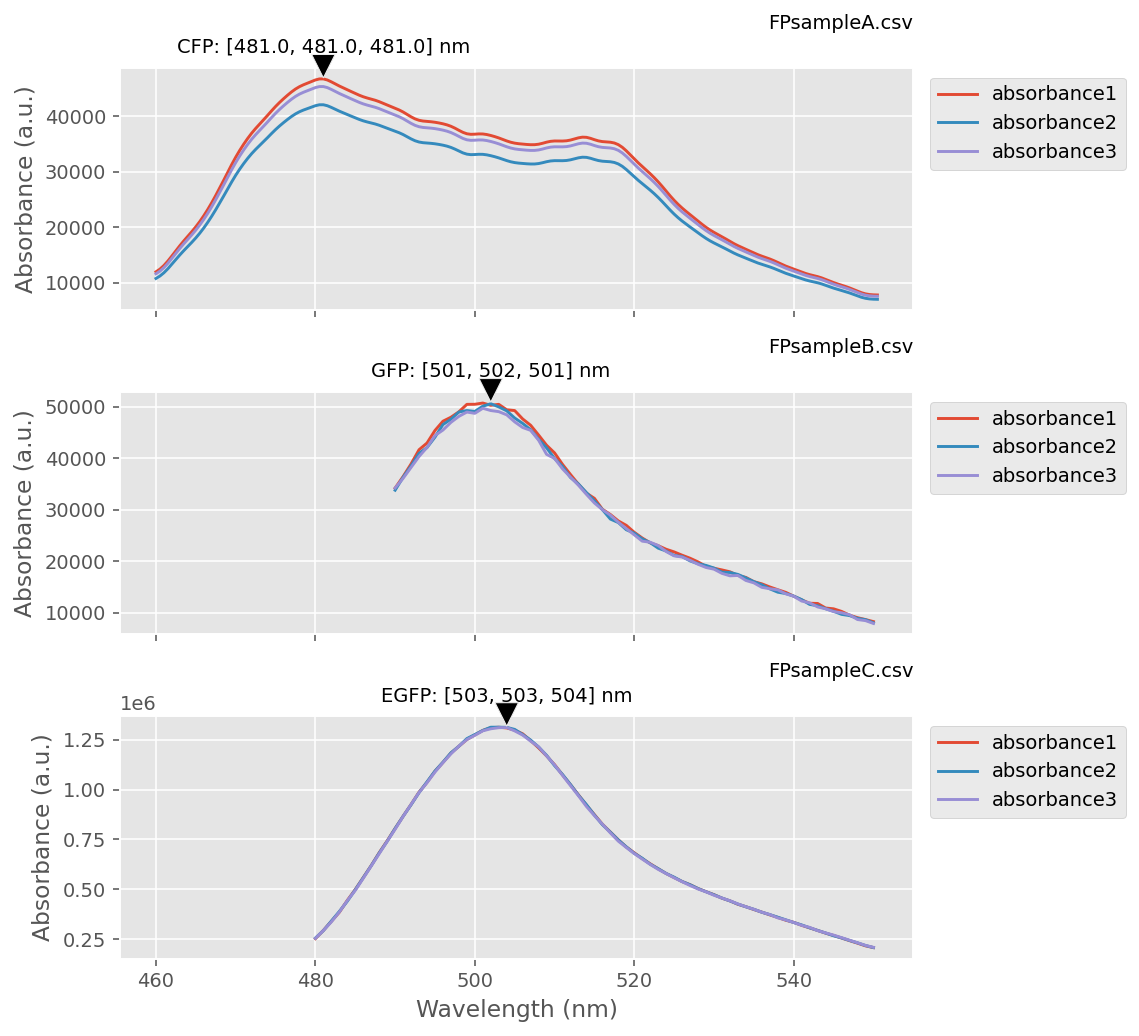

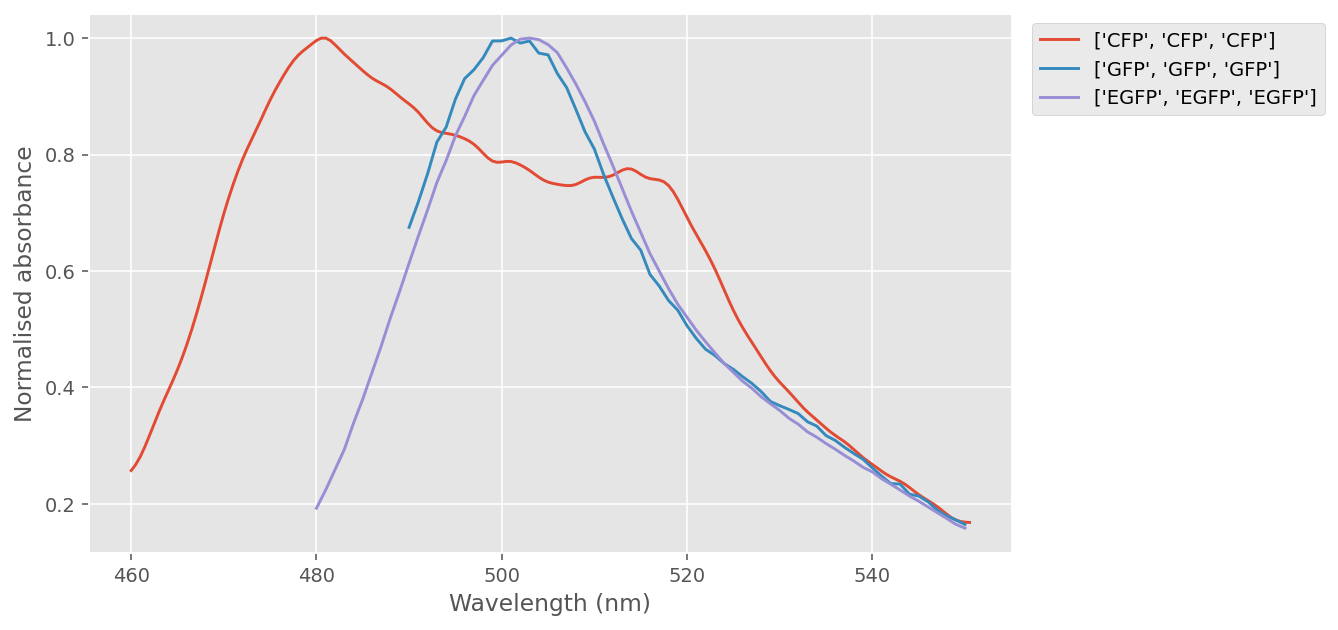

Saved as testv2-a.txt

Saved as testv2-b.txt

Saved as testv2-c.txt



In [63]:
cols = [] #adds column header from dataframe to use as figure legend
for d in sample1.iloc[:,1::2]: #iterate through 'absorbance' columns
    cols.append(d) 

#Check if sample dataframe(s) exists, if so create plot parameters
try:
    x1 = sample1.iloc[:,0] #select wavelength columns
    y1 = sample1.iloc[:,1::2] #select absorbance columns
    y1_norm = y1/y1.max() #Normalised y values should the user want a normalised plot.
    s1_lab = sample1.name
except (AttributeError, NameError):
    print("No sample found! Check if samples are loaded or restart kernel.")
try:
    x2 = sample2.iloc[:,0]
    y2 = sample2.iloc[:,1::2]
    y2_norm = y2/y2.max()
    s2_lab = sample2.name
except NameError:
    pass
try: 
    x3 = sample3.iloc[:,0]
    y3 = sample3.iloc[:,1::2]
    y3_norm = y3/y3.max()
    s3_lab = sample3.name
except NameError:
    pass

#Plotting samples
#Create a canvas that supports up to 3 subplots, each on its own row, share x-axis so that each subplot has the same horizontal scale
fig, axs = plt.subplots(nrows = 3, ncols = 1,sharex=True,dpi=140) #dpi > 100 gives a nice image resolution
y_label = 'Absorbance (a.u.)'
x_label = 'Wavelength (nm)'

#Plotting function
def plotAxes(int,x_,y_,plot_title): # Arguments: axes index, x, y, plot title
    axs[int].plot(x_, y_, label = cols)
    axs[int].set_title(plot_title,fontsize=10,loc='right',pad=20) #pad to avoid overlap with annotations
    axs[int].legend(bbox_to_anchor=(1.28, 1)) # Position legend box outside of axes boundary

# Labels protein name (fp_name) and annotate peak absorbance (x_max,y_max) with an arrow per subplot (axs[int])
def plotAnnotate(px_,py_,fp_name,int): 
    pymax = max(py_)
    marker = axs[int].annotate(f'{fp_name[int]}: {px_} nm', xy=(px_[int], pymax), 
        xytext=(px_[int], pymax*1.1),ha='center',arrowprops=dict(facecolor='black', shrink=0.05))
    return marker
#Prevent the duplicate labels from repeating in the figure legend - solution found from https://stackoverflow.com/a/13589144
def noDuplicateLegend(ax): 
    handles, labels = plt.gca().get_legend_handles_labels() #Get each handel and label from plot legend
    by_label = dict(zip(labels, handles)) # Sort these into a dictionary so that there are no duplicates
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.35, 1)) #Plot dictionary version of label

#First subplot
try: 
    plotAxes(0,x1,y1,s1_lab)
    plotAnnotate(protein1[1],protein1[2],protein1[0],0)
except (NameError,IndexError):
    print("No sample found! Check if samples are loaded or restart kernel.")
    del fig
try: #Second subplot (if sample 2 exists)
    plotAxes(1,x2,y2,s2_lab)
    plotAnnotate(protein2[1],protein2[2],protein2[0],1)
except (ValueError, NameError):
    axs[1].set_axis_off() #Remove from figure axis
    fig.delaxes(axs[1]) #Deletes unused subplots
try: #Third subplot
    plotAxes(2,x3,y3,s3_lab)
    plotAnnotate(protein3[1],protein3[2],protein3[0],2)
except (ValueError, NameError):
    axs[2].set_axis_off()
    fig.delaxes(axs[2])

#Iterate through each axis and set y-axis label
for ax in axs:
    ax.set_ylabel(y_label,fontsize=12)
#If fewer than 3 samples were imported,  make x-axis label show only on the prior plot in axes array by checking if axs[n] is 'on'.
if axs[2].axison: #Tried to use axs[-1] but fig.delaxes does not completely remove the subplot, so have to specifically index for axs[2]  
    pass
else:
    axs[1].tick_params(axis='x',labelbottom=True)
if axs[1].axison: #Same as above if only 1 file imported, make x-axis label show on first subplot
    pass
else:
    axs[0].tick_params(labelbottom=True)

plt.xlabel(x_label,fontsize=12)
fig.set_size_inches(8.5,7.5)
fig.tight_layout() #Prevent subplots overlapping
plt.show()
#Optional: normalised y-axis plot
plot_norm = str(input("Plot normalised graph? Y/N")).upper()
if plot_norm == "Y":
    try:
        ynorm_label = "Normalised absorbance" #Y-axis label for normalised plot
        norm_fig, axes = plt.subplots(dpi=140)
        axes.plot(x1,y1_norm.iloc[:,0],label = protein1[0])
        axes.plot(x2,y2_norm.iloc[:,0],label = protein2[0])
        axes.plot(x3,y3_norm.iloc[:,0],label = protein3[0])
    except (AttributeError,NameError):
        try:
            plt.cla() #If above does not work, clear current axis and replot with only existing dataframes
            axes.plot(x1,y1_norm.iloc[:,0],label = protein1[0])
            axes.plot(x2,y2_norm.iloc[:,0],label= protein2[0])
        except (AttributeError, NameError): 
            try:
                plt.cla() #Same as above 
                axes.plot(x1,y1_norm,label = protein1[0])
                axes.set(xlabel= x_label, ylabel = ynorm_label)
            except ValueError:
                print("No x or y data found!")
    finally:
        noDuplicateLegend(axes) #from the defined noDuplicate function above
        norm_fig.set_size_inches(8.5,5)
        plt.ylabel(ynorm_label)
        plt.xlabel(x_label)
        plt.show()
else:
    pass

#Give user the option to save plot as an image to disk
export_fig = str(input("Save plots? Y/N: ").upper()) # Save prompt
if export_fig == 'Y':
    plot_name = str(input("Save plot as: ")) # User-defined file name
    fig.savefig(plot_name+'.png',bbox_inches='tight') #removes whitespace when subplots < 3
    try:
        norm_fig.savefig(f'{plot_name}_norm'+'.png',bbox_inches='tight') #set boundary box to tight as legend was being cut-off
    except NameError:
        pass
    finally:
        print(f"{plot_name} saved.\n")
else:
    pass
#Finally, save to text file, works in a the same manner as for figures.
export_txt = str(input(f"Save results to text file? Y/N: ").upper()) 
if export_txt == 'Y':
    exportResult(sample1, protein1)
    try:
        if not sample2.empty: #If sample 2 dataframe is not empty, save to file. Could also just check with  `if sample2:` since it is deleted if second file was not loaded in.
            exportResult(sample2,protein2)
            try:
                if not sample3.empty:
                    exportResult(sample3,protein3)
            except NameError:
                pass
    except NameError: #Otherwise if sample 2 does not exist, pass
        pass
else:
    pass #The end.

From these analyses the program identified, with a 5 nm offset, the three samples consistently as:
* Sample A – **CFP**
* Sample B – **GFP** 
* Sample C - **EGFP** <br />

![Figure 1](Figures/plot.png) <br />
*Figure 1. Labelled emission spectrum curves for samples A , B and C.*

![Figure 2](Figures/plot_norm.png) <br />
*Figure 2. Normalised emission spectrum plot to visualise multiple samples simultaneously* <br />

![Figure 3](Figures/52Mfigure1.png)

*Figure 3. Screenshot of output text file showing summarised results for samples A, B and C. 
**Note**: in FluoreSense V2, brackets have been removed and are now provided as a comma-separated list.* 

## Discussion

We believe this prototype program to be a simple, cost-effective tool to help distinguish certain fluorescent proteins, requiring only a spectrophotometer to obtain raw data. Sample A, which matched CFP (**Figure 1**), was found to fluoresce slightly weaker than reference GFP (relative absorbance $< 1.0$) and had an emission peak at 481nm for all three repeats. Sample B matched GFP having emission peaks of 501 – 502nm, which shifted slightly lower than the expected reference peak (504nm). Lastly, Sample C matched EGFP due to a distinctively higher absorbance peak from the other two samples (relative absorbance $= 26.0$), with emission peaks at 503 - 504nm. 

We believe that these results are reliable as they are consistent to previously reported findings. Albeit, the GFP sample was likely excited at the minor peak at 475nm, which corresponds to a maxima at 503nm (Tsien, 1998). As excitation at 488nm results in a maximum at 504nm (Patterson et al., 1997). Whereas the emission maxima of the CFP sample was approximate to the maxima of 480nm as reported by Heim et al. (1994). It also fluoresced weakly than GFP, due to this there was no fluorescence data available for CFP. We therefore arbitrarily set the relative fluorescence to less than 0.95 for determining CFP. Cormack et al. (1996) found that EGFP fluoresces 20 – 35-fold brighter than GFP, so we based our EGFP characterisation from this observation. Although it is worth noting that different studies may report varying fluorescence intensities as different host cells express proteins at different efficiencies. 

Nonetheless, due to a design oversight, the program has a key limitation - it assumes the samples have already been excited. It would be optimal to consider both an excitation and emission spectrum for the samples to reduce ambiguity, as evidenced by the overlapping emission spectra for GFP and EGFP. Additionally, as in the case of GFP, by considering for different excitation peaks, the corresponding emission peak can be inferred more accurately. We also based our emission spectra identification algorithm solely based on data from Tsien (1998), including additional primary sources as part of the criteria could reduce discrepancies and mismatches. The addition of these features in future iterations should reduce the dependency of the offset feature and improve reliability of results. 

Optionally, it would be desirable to also calculate the sample quantum yield, and subsequently compare to known values. This provides more characteristics for the program to robustly identify the protein (Fery-Forgues and Lavabre, 1999). Another limitation to note is that the program is only capable of identifying GFP, EGFP and CFP. Other variants, like the red fluorescent proteins (RFPs) or yellow fluorescent proteins (YFPs), are not accounted for despite their prominent use in biological research (Chudakov et al., 2010). 


Technical limitations of the program primarily concern having only one reference model protein. We believe that being able to assign different references would be useful for the user, for instance EGFP is now commonly used as a reference protein to measure relative fluorescence (Wiedenmann et al., 2009). Moreover, the program is currently designed to select specific column positions (Wavelength1, Absorbance1, Wavelength2, Absorbance2, etc.) from the .csv file, therefore if a file does not follow this format, the program may select the incorrect column for analysis. Additionally, only .csv files are supported. Other file types such as .txt and .xlsx are also commonly used to store data. 

Plots currently display a list of emission peaks for each repeat. The marker is positioned for one repeat, as well as the protein name. To improve this, a unique marker should be made per repeat to accurately mark the points without overlapping with one another. The aesthetics of the plot could also be improved by making each line have a different style. We found that the library, Seaborn (https://seaborn.pydata.org/), has better customisation options than matplotlib and is simpler to use. It might be worth integrating this into our program as it is also based on matplotlib, meaning it is functionally similar and would not be difficult to reprogram our code.

Finally, some optimisations to the code would be desirable as the program currently contains a lot of repetitive code. Simplifying certain processes, such as saving protein details into a collective list or dictionary, or creating several functions to minimise repetition would be more efficient.

## References

Agilent, n.d. UV-Vis Spectroscopy & Spectrophotometer FAQs | Agilent [WWW Document]. URL https://www.agilent.com/en/support/molecular-spectroscopy/uv-vis-uv-vis-nir-spectroscopy/uv-vis-spectroscopy-spectrophotometer-basics (accessed 3.17.23).

Chudakov, D.M., Matz, M.V., Lukyanov, S., Lukyanov, K.A., 2010. Fluorescent Proteins and Their Applications in Imaging Living Cells and Tissues. Physiological Reviews 90, 1103–1163. https://doi.org/10.1152/physrev.00038.2009

Cormack, B.P., Valdivia, R.H., Falkow, S., 1996. FACS-optimized mutants of the green fluorescent protein (GFP). Gene, Flourescent Proteins and Applications 173, 33–38. https://doi.org/10.1016/0378-1119(95)00685-0

Costantini, L.M., Baloban, M., Markwardt, M.L., Rizzo, M.A., Guo, F., Verkhusha, V.V., Snapp, E.L., 2015. A palette of fluorescent proteins optimized for diverse cellular environments. Nat Commun 6, 7670. https://doi.org/10.1038/ncomms8670

Fery-Forgues, S., Lavabre, D., 1999. Are Fluorescence Quantum Yields So Tricky to Measure? A Demonstration Using Familiar Stationery Products. J. Chem. Educ. 76, 1260. https://doi.org/10.1021/ed076p1260

Heim, R., Prasher, D.C., Tsien, R.Y., 1994. Wavelength mutations and posttranslational autoxidation of green fluorescent protein. Proceedings of the National Academy of Sciences 91, 12501–12504. https://doi.org/10.1073/pnas.91.26.12501

Lambert, T.J., 2019. FPbase: a community-editable fluorescent protein database. Nat Methods 16, 277–278. https://doi.org/10.1038/s41592-019-0352-8

Lippincott-Schwartz, J., Patterson, G.H., 2003. Development and Use of Fluorescent Protein Markers in Living Cells. Science 300, 87–91. https://doi.org/10.1126/science.1082520

N. Day, R., W. Davidson, M., 2009. The fluorescent protein palette: tools for cellular imaging. Chemical Society Reviews 38, 2887–2921. https://doi.org/10.1039/B901966A

Patterson, G.H., Knobel, S.M., Sharif, W.D., Kain, S.R., Piston, D.W., 1997. Use of the green fluorescent protein and its mutants in quantitative fluorescence microscopy. Biophysical Journal 73, 2782–2790. https://doi.org/10.1016/S0006-3495(97)78307-3

Tsien, R.Y., 1998. The Green Fluorescent Protein. Annual Review of Biochemistry 67, 509–544. https://doi.org/10.1146/annurev.biochem.67.1.509

Wiedenmann, J., Oswald, F., Nienhaus, G.U., 2009. Fluorescent proteins for live cell imaging: Opportunities, limitations, and challenges. IUBMB Life 61, 1029–1042. https://doi.org/10.1002/iub.256